In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import glob

Baca semua file dalam folder yang memiliki format CSV dan digabungkan dalam satu dataframe

In [136]:
path = 'C:/Users/user/data/pollutant'
csv_files = glob.glob(path + '/*.csv')
df_list = (pd.read_csv(file) for file in csv_files)

In [137]:
df = pd.concat(df_list)

In [138]:
display(df)

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-10-01,DKI1 (Bunderan HI),57,81,30,11,32,38,81,PM25,SEDANG
1,2021-10-02,DKI1 (Bunderan HI),67,99,32,11,30,35,99,PM25,SEDANG
2,2021-10-03,DKI1 (Bunderan HI),70,85,29,10,28,28,85,PM25,SEDANG
3,2021-10-04,DKI1 (Bunderan HI),58,82,30,11,34,29,82,PM25,SEDANG
4,2021-10-05,DKI1 (Bunderan HI),55,76,29,11,30,33,76,PM25,SEDANG
...,...,...,...,...,...,...,...,...,...,...,...
145,2021-09-26,DKI5 (Kebon Jeruk) Jakarta Barat,48,67,---,4,30,9,67,PM25,SEDANG
146,2021-09-27,DKI5 (Kebon Jeruk) Jakarta Barat,51,78,---,9,22,18,78,PM25,SEDANG
147,2021-09-28,DKI5 (Kebon Jeruk) Jakarta Barat,42,64,---,5,26,14,64,PM25,SEDANG
148,2021-09-29,DKI5 (Kebon Jeruk) Jakarta Barat,56,87,---,11,34,19,87,PM25,SEDANG


# Seberapa Buruk Kualitas Udara di Ibukota dan Kota Manakah Yang Memiliki Kualitas Udara Paling Buruk

In [139]:
#Ubah kolum tanggal menjadi bentuk datetime
df['tanggal'] = pd.to_datetime(df['tanggal'])

#buat kolum baru dari bulan
df['month'] = df['tanggal'].dt.month

#ganti angka bulan menjadi string sesuai dengan nama bulan
month_label = ['January','February','March','April','May','June','July','August','September','October','November','December']
df['month'] = df['month'].apply(lambda data: month_label[data-1])
df['month'] = pd.Categorical(df['month'], categories=month_label)

In [140]:
#buat tabel pivot untuk persiapan pembuatan bar chart dan ganti nama stasiun untuk memudahkan pembaca.
pivotdf = df.pivot_table(index='stasiun', columns='month', values='max', aggfunc= max, dropna = False)
pivotdf = pivotdf.rename(index={'DKI1 (Bunderan HI)':'Bunderan HI',
                                'DKI2 (Kelapa Gading)':'Kelapa Gading',
                                'DKI3 (Jagakarsa)':'Jagakarsa',
                                'DKI4 (Lubang Buaya)':'Lubang Buaya',
                                'DKI5 (Kebon Jeruk) Jakarta Barat':'Kebon Jeruk'})
display(pivotdf)

month,January,February,March,April,May,June,July,August,September,October,November,December
stasiun,,,,,,,,,,,,
Bunderan HI,108,79,102,101,110,109,108,112,94,106,85,85
Kelapa Gading,134,87,115,115,116,108,129,110,105,115,95,99
Jagakarsa,126,110,118,104,151,127,132,104,108,107,95,91
Lubang Buaya,89,113,125,138,118,147,174,140,120,157,106,99
Kebon Jeruk,80,126,117,118,115,129,140,126,108,112,91,90


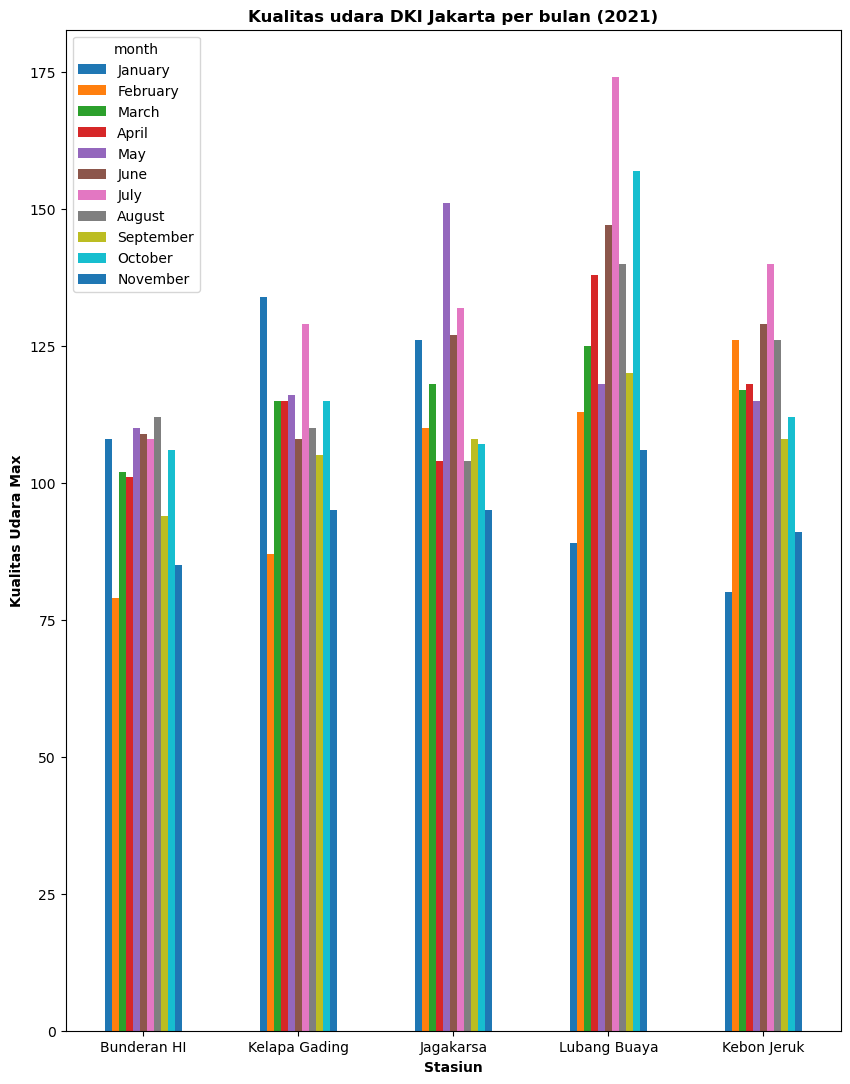

In [141]:
#bentuk bar chart dengan mengumpulkan stasiun sesuai kategori, menggunakan kualitas udara maksimal per bulan sebagai value.
ax = pivotdf.plot(kind='bar')
fig = ax.get_figure()
fig.set_size_inches(10,13)
ax.set_xlabel('Stasiun', fontweight='bold')
ax.set_ylabel('Kualitas Udara Max', fontweight='bold')
ax.set_title('Kualitas udara DKI Jakarta per bulan (2021)', fontweight='bold')
for tick in ax.get_xticklabels():
    tick.set_rotation(0)

Kualitas udara paling buruk bisa ditemukan di Jakarta Timur, sesuai dengan SPKU Lubang Buaya, dengan indeks kualitas udara maksimal mencapai 175 di bulan Juli, selain itu Jakarta Timur menduduki tempat pertama, kedua, dan keempat dalam kualitas udara terburuk di tahun 2021. hal ini disebabkan karena Jakarta Timur yang menjadi pusat industri Ibukota.

# Seberapa Kali Kualitas Udara Ibukota Mencapai Kategori Tidak Sehat Dalam Setahun

In [142]:
#buat dataframe sesuai dengan kategori kualitas udara
dfcat = df.groupby('categori').size()
dfcat = dfcat.sort_values(ascending = False)
dfcat

categori
SEDANG            1349
TIDAK SEHAT        272
BAIK               188
TIDAK ADA DATA      16
dtype: int64

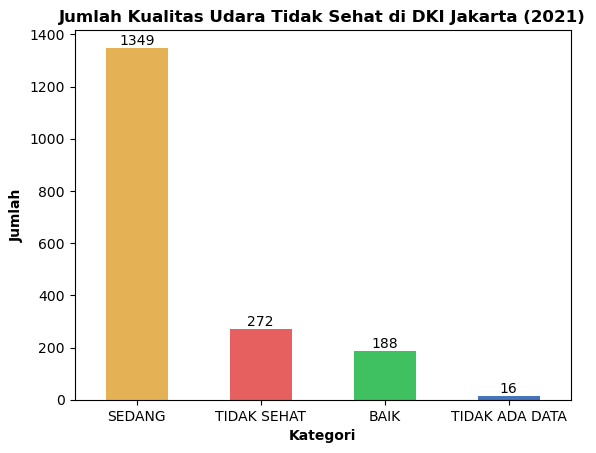

In [143]:
#buat bar chart yang sesuai
ax = dfcat.plot(kind = 'bar',color=(['#e4b255','#e6605f','#3fc061','#4574ba']))
fig = ax.get_figure()  
ax.set_xlabel('Kategori',fontweight = 'bold')
ax.set_ylabel('Jumlah',fontweight = 'bold')
ax.set_title('Jumlah Kualitas Udara Tidak Sehat di DKI Jakarta (2021)',fontweight='bold')

#tunjukkan angka diatas bar masing-masing kategori
ax.bar_label(ax.containers[0],label_type='edge')

#putar label di X
for tick in ax.get_xticklabels():
    tick.set_rotation(0)

Kualitas udara di DKI Jakarta mencapai kategori "Tidak Sehat" (101-199) sebanyak 272 kali dalam satu tahun, kualitas udara yang paling sering didapatkan termasuk dalam kategori "Sedang" (51-100) kualitas udara dalam kategori sedang berarti udara yang buruk tidak berpengaruh terhadap manusia dan hewan tetapi akan berpengaruh terhadap tumbuhan tertentu.

# Polutan Terbanyak di Tahun 2021

In [152]:
#Buat df dengan polutan sebagai kategori
meltdf = df.melt(id_vars=['month'], value_vars=['no2', 'co', 'so2', 'o3'])
meltdf = meltdf.rename(columns={'variable': 'pollutant', 'value': 'concentration'})
meltdf

#jumlahkan rata-rata per bulan
total_mean_concentrations = mean_concentrations.groupby(level='pollutant').sum()

#sortir jumlah rata-rata dari tertinggi ke terendah
total_mean_concentrations = total_mean_concentrations.sort_values(ascending=False)
total_mean_concentrations

pollutant
so2    424.583745
o3     380.544810
no2    235.011491
co     142.963489
Name: concentration, dtype: float64

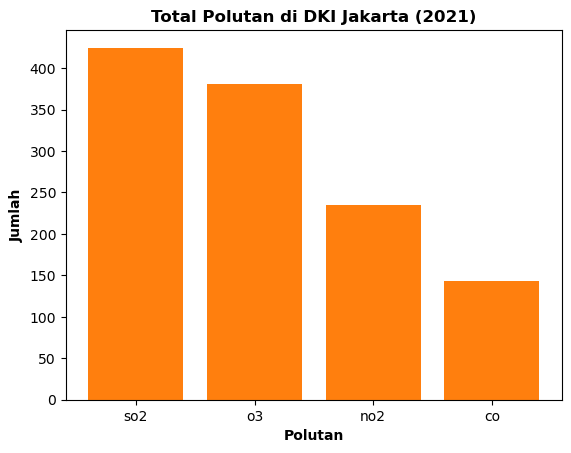

In [151]:
#buat bar chart
plt.bar(total_mean_concentrations.index, total_mean_concentrations.values)
plt.title("Total Polutan di DKI Jakarta (2021)", fontweight = 'bold')
plt.xlabel("Polutan", fontweight = 'bold')
plt.ylabel("Jumlah", fontweight = 'bold')
plt.bar(total_mean_concentrations.index, total_mean_concentrations.values)
plt.show()